In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("https://api.covid19india.org/csv/latest/districts.csv")

In [3]:
df=df.loc[df['District'] == "Madurai"]

In [4]:
DF=df
DF.rename(columns={'Confirmed':'Total Confirmed',
                          'Recovered':'Total Recovered',
                          'Deceased':'Total Deceased'}, 
                 inplace=True)
xx=len(DF) - 1
DF=DF.head(xx)

In [5]:
DF.head()

,Date,State,District,Total Confirmed,Total Recovered,Total Deceased,Migrated,Tested
317,2020-04-26,Tamil Nadu,Madurai,75,8,2,0,NaN
750,2020-04-27,Tamil Nadu,Madurai,79,8,2,0,NaN
1194,2020-04-28,Tamil Nadu,Madurai,79,36,2,0,NaN
1642,2020-04-29,Tamil Nadu,Madurai,79,40,2,0,NaN
2091,2020-04-30,Tamil Nadu,Madurai,84,40,2,0,NaN


In [6]:
TConfirmed = list(DF["Total Confirmed"])
DConfirmed = [None] * len(DF)
i = 1
while i < len(DF):
    DConfirmed[i]=TConfirmed[i]-TConfirmed[i-1]
    i += 1
DF["Daily Confirmed"]=DConfirmed
DF["Day"]=range(1,xx+1)
i = range(0,len(DF))
DF['Index']=i
DF=DF.set_index('Index')
xlen=len(DF)
sp=round(xlen*0.9)
DF['Date'] = pd.to_datetime(DF['Date'])
df=DF

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [7]:
df2 = DF.tail(6)
df1 =DF.tail(6)

In [8]:
X1 = np.array(df1['Day'])
X2 = np.array(df2['Day'])
#Y1 = np.array(df1['Total Confirmed'])
#Y2 = np.array(df1['Total Recovered'])
#Y3 = np.array(df1['Total Deceased'])
Y1 = np.log(df1['Total Confirmed'])
Y1 = np.array(Y1)
Y2 = np.log(df1['Total Recovered'])
Y2 = np.array(Y2)
Y3 = np.log(df1['Total Deceased'])
Y3 = np.array(Y3)
#Y4 = np.array(df2['Daily Confirmed'])

Y4 =np.log(df2['Daily Confirmed'])
Y4 = np.array(Y4)
from sklearn.linear_model import LinearRegression
X1=X1.reshape(-1, 1)
X2=X2.reshape(-1, 1)
Y1=Y1.reshape(-1, 1)
Y2=Y2.reshape(-1, 1)
Y3=Y3.reshape(-1, 1)
Y4=Y4.reshape(-1, 1)

reg1 = LinearRegression().fit(X1, Y1)
reg2 = LinearRegression().fit(X1, Y2)
reg3 = LinearRegression().fit(X1, Y3)
reg4 = LinearRegression().fit(X2, Y4)


logb1 = reg1.coef_
loga1 = reg1.intercept_
a1 = np.exp(loga1)
b1 = np.exp(logb1)

logb2 = reg2.coef_
loga2 = reg2.intercept_
a2 = np.exp(loga2)
b2 = np.exp(logb2)

logb3 = reg3.coef_
loga3 = reg3.intercept_
a3 = np.exp(loga3)
b3 = np.exp(logb3)

logb4 = reg4.coef_
loga4 = reg4.intercept_
a4 = np.exp(loga4)
b4 = np.exp(logb4)



#print("Based on Last 20 Days Data")
#print ("Total Confirmed Accuracy", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Confirmed", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Recovered ", reg2.score(X1, Y2)*100)
print ("coefficient of determination for Total Deceased ", reg3.score(X1, Y3)*100)
print("coefficient of determination for Based on Last 30 Days Data")
print ("coefficient of determination for Daily Confirmed ", reg4.score(X2, Y4)*100)
#print ("coefficient of determination for Daily Recovered ", reg5.score(X2, Y5)*100)
#print ("coefficient of determination for Daily Deceased ", reg6.score(X2, Y6)*100)


coefficient of determination for Total Confirmed 99.50564440482604
coefficient of determination for Total Recovered  98.58586677897158
coefficient of determination for Total Deceased  99.78521071322128
coefficient of determination for Based on Last 30 Days Data
coefficient of determination for Daily Confirmed  29.95520676778901


In [9]:
drange = 15
start =len(df) +1
dval = np.arange(start,start+drange,1)
dval= np.array(dval)
val= dval
dval=dval.reshape(-1, 1)

start1 =len(DF)
dval1 = np.arange(start1,start1+drange,1)
dval1= np.array(dval1)
val1= dval1
dval1=dval1.reshape(-1, 1)
import datetime
base = datetime.date.today() - datetime.timedelta(days=1)
date_list = [base + datetime.timedelta(days=x) for x in range(drange)]

# DConfirmed = forecast(drange+1)
# DConfirmed =DConfirmed[:-1]
DConfirmed = np.round_(np.multiply(a4,(np.power(b4,val))))
TConfirmed = np.round_(np.multiply(a1,(np.power(b1,val1))))
#TConfirmed = np.round_(reg1.predict(dval1))
#DRecovered = np.round_(np.multiply(a5,(np.power(b5,val))))
#TRecovered = np.round_(np.multiply(a2,(np.power(b2,val1))))
#TRecovered = np.round_(reg2.predict(dval1))
#DDeceased = np.round_(np.multiply(a6,(np.power(b6,val))))
#TDeceased = np.round_(np.multiply(a3,(np.power(b3,val1))))
#TDeceased = np.round_(reg3.predict(dval1))

# DConfirmed= DConfirmed.flatten()
# TConfirmed= TConfirmed.flatten()
# i = 1
# while i < len(TConfirmed):
#     DConfirmed[i]=TConfirmed[i]-TConfirmed[i-1]
#     i += 1
ii=len(DF)-1
lastD = DF['Daily Confirmed'][ii]
lastT = DF['Total Confirmed'][ii]
lastDat = DF['Date'][ii]
new_row = pd.DataFrame({'Daily Confirmed':lastD.flatten() ,
                        'Total Confirmed':lastT.flatten(),
                        'Date': pd.to_datetime(lastDat)
                        })
#DConfirmed[0]=DF['Total Confirmed'][0]-TConfirmed[0]
dict = {
        'Date' : date_list,
        'Daily Confirmed': DConfirmed.flatten(), 
        'Total Confirmed': TConfirmed.flatten(), 
   #     'Daily Recovered': DRecovered.flatten() ,
    #    'Total Recovered': TRecovered.flatten(),
    #    'Daily Deceased' : DDeceased.flatten(),
     #   'Total Deceased' : TDeceased.flatten(),
        'Day' : dval1.flatten() ,
       } 
final = pd.DataFrame(dict) 
final = pd.concat([new_row, final]).reset_index(drop = True) 
final['Date'] = pd.to_datetime(final['Date'])
final.head(5) 

,Daily Confirmed,Total Confirmed,Date,Day
0,210.0,9805.0,2020-07-26,NaN
1,310.0,9838.0,2020-07-26,92.0
2,336.0,10132.0,2020-07-27,93.0
3,365.0,10435.0,2020-07-28,94.0
4,395.0,10747.0,2020-07-29,95.0


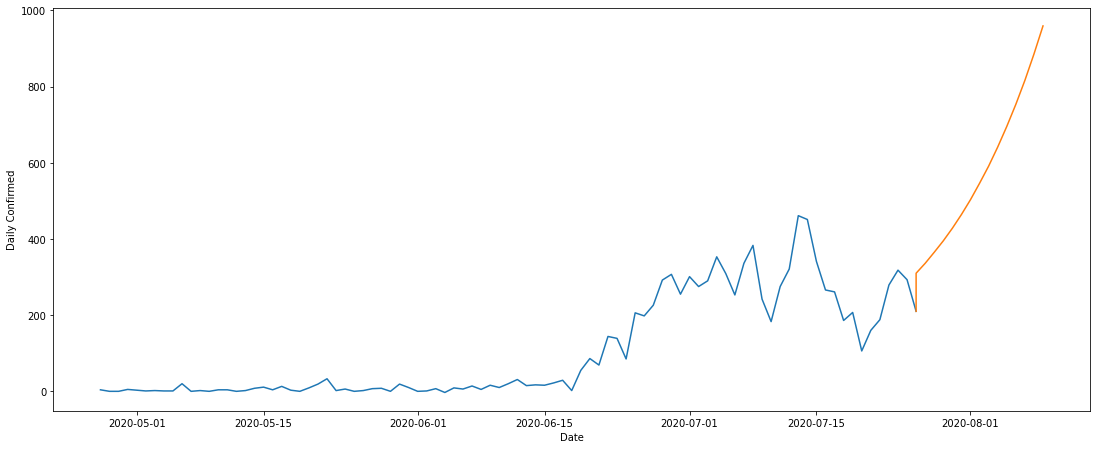

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(18,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = df['Date']
position =df['Daily Confirmed']

time1 = final['Date']
position1 = final['Daily Confirmed']

axes.plot(time, position)
axes.plot(time1, position1)
plt.xlabel('Date')
plt.ylabel('Daily Confirmed')

plt.show()
fig.savefig('MDU_Daily.png')


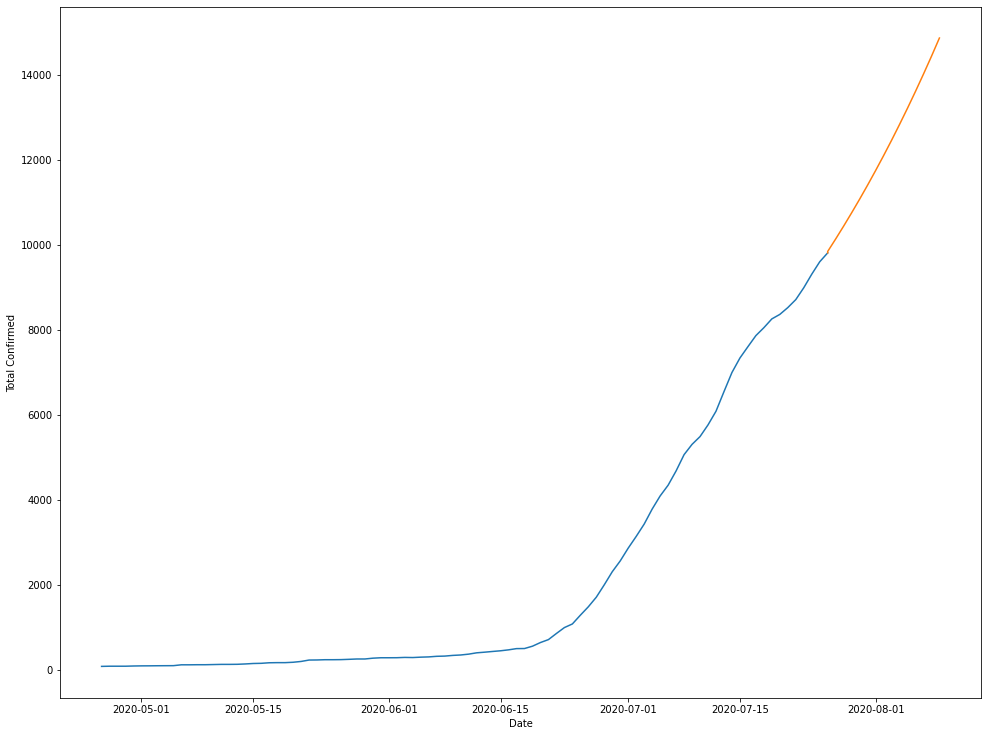

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(16,12))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = DF['Date']
position =DF['Total Confirmed']

time1 = final['Date']
position1 = final['Total Confirmed']
axes.plot(time, position)
axes.plot(time1, position1)

plt.xlabel('Date')
plt.ylabel('Total Confirmed')
fig.savefig('MDU_Total.png')

In [12]:
#save to Csv
final = final.iloc[1:]
final.to_csv("predictMDU.csv")
pr=pd.read_csv('predictMDU.csv')
pr.head()

,Unnamed: 0,Daily Confirmed,Total Confirmed,Date,Day
0,1,310.0,9838.0,2020-07-26,92.0
1,2,336.0,10132.0,2020-07-27,93.0
2,3,365.0,10435.0,2020-07-28,94.0
3,4,395.0,10747.0,2020-07-29,95.0
4,5,428.0,11068.0,2020-07-30,96.0


In [14]:
#Doubling Rate for every 7 days 
T1=DF['Total Confirmed']
an = 7
reminder = (len(T1)%an) 
if reminder != 0 :
  T1 = T1[0:-reminder]
re = ((len(T1))// an )
Week=range(0,re)
T1 = T1.to_numpy()
T1=T1.reshape(re,an) 
double =  []
print(len(T1))
for n in range(0,len(T1)):
  l2 = np.log(2)
  Diff = np.log(T1[n][an-1]/T1[n][0])
  V= l2*(an-1)/Diff
  double.append(V)
WL = DF['Date']
WL=WL[6::an]
DRate = pd.DataFrame(list(zip(double, Week,WL)), 
               columns =['DRate', 'Weeks','Date'])
DRate.tail()

13


,DRate,Weeks,Date
8,4.715560,8,2020-06-27
9,6.518409,9,2020-07-04
10,12.121674,10,2020-07-11
11,14.839863,11,2020-07-18
12,27.559113,12,2020-07-25


<Figure size 1296x432 with 0 Axes>

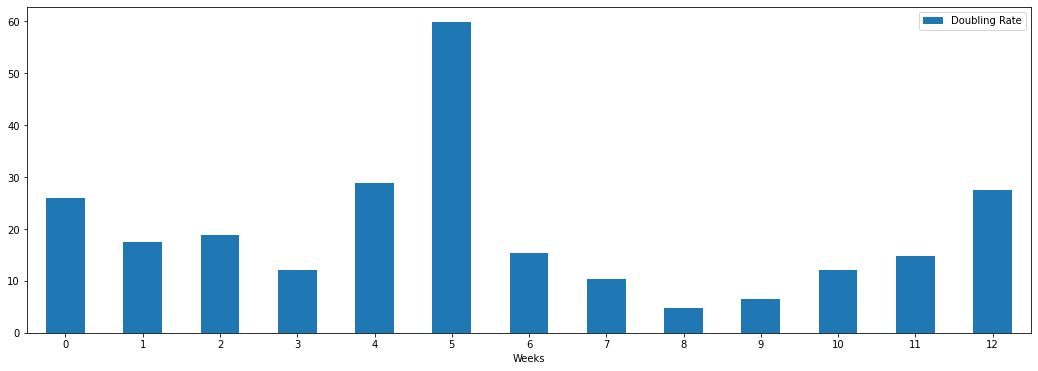

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(18,6))
ax = DRate.plot.bar(x='Weeks', y='DRate', rot=0,figsize=(18,6),label='Doubling Rate' )
plt.savefig('MDu Doubling Rate')

In [29]:
df= pd.read_csv("https://api.covid19india.org/csv/latest/districts.csv")
name = "Wayanad"
df1=df.loc[df['District'] == name ]
df1.tail()

,Date,State,District,Confirmed,Recovered,Deceased,Migrated,Tested
56553,2020-07-23,Kerala,Wayanad,325,132,1,0,NaN
57265,2020-07-24,Kerala,Wayanad,340,153,1,0,NaN
57976,2020-07-25,Kerala,Wayanad,357,198,1,0,NaN
58688,2020-07-26,Kerala,Wayanad,385,198,1,0,NaN
59400,2020-07-27,Kerala,Wayanad,385,198,1,0,NaN


In [17]:
T1=df1['Confirmed']
an = 6
reminder = (len(T1)%an) 
if reminder != 0 :
  T1 = T1[0:-reminder]
re = ((len(T1))// an )
Week=range(0,re)
T1 = T1.to_numpy()
T1=T1.reshape(re,an) 
double =  []
print(len(T1))
for n in range(0,len(T1)):
  l2 = np.log(2)
  Diff = np.log(T1[n][an-1]/T1[n][0])
  V= l2*(an-1)/Diff
  double.append(V)
WL = DF['Date']
WL=WL[6::an]
DRate = pd.DataFrame(list(zip(double, Week,WL)), 
               columns =['DRate', 'Weeks','Date'])
DRate.tail()

15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


,DRate,Weeks,Date
10,20.167185,10,2020-07-01
11,20.553197,11,2020-07-07
12,9.716791,12,2020-07-13
13,9.308665,13,2020-07-19
14,14.564447,14,2020-07-25


'Wayanad'

<Figure size 1296x432 with 0 Axes>

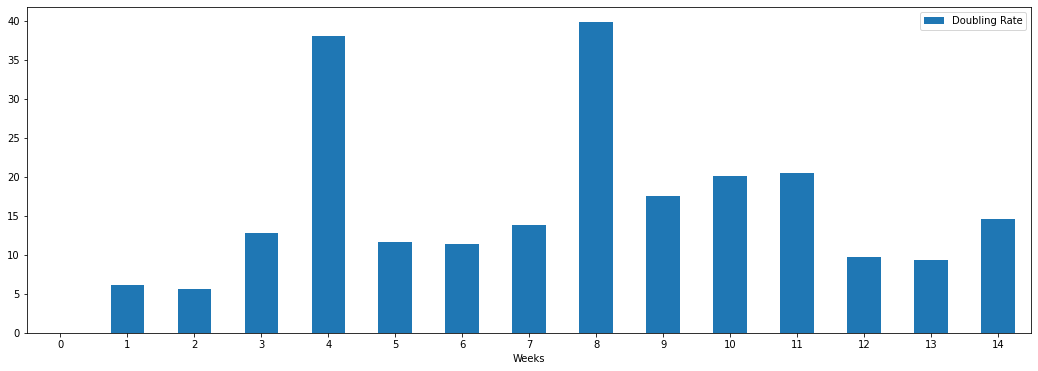

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(18,6))
ax = DRate.plot.bar(x='Weeks', y='DRate', rot=0,figsize=(18,6),label='Doubling Rate' )

plt.savefig( name +' Doubling Rate')
name